# Libraries

In [1]:
import time

# Functions

In [121]:
def timed(f):
    def timer(*args, **kwargs):
        start = time.process_time()
        Fn = f(*args, **kwargs)
        end = time.process_time()

        print(f"func: {f.__name__}, args: ({args}, {kwargs}), "
              f"secs: {end - start:.2}")

        return Fn

    return timer

# Algorithms Problems

## Fibonacci Numbers
**Definition**

$
f_n =
\begin{cases}
0, \quad \quad \quad \quad \quad n=0,\\ 
1, \quad \quad \quad \quad \quad n=1,\\
F_{n-1} + F_{n-2}, \ n>1.
\end{cases}
$

### Naive Algorithm

In [72]:
def fib_recurs(n):
    if n <= 1:
        return n
    else:
        return fib_recurs(n - 1) + fib_recurs(n - 2)

In [113]:
n = 40

start = time.process_time()
Fn = fib_recurs(n)
end = time.process_time()

print(f"{fib_recurs.__name__}(n={n}) sec: {end - start:.2f}")
print(f"Fn({n}) = {Fn}")

fib_recurs(n=40) sec: 16.55
Fn(40) = 102334155


Why so slow?

Because it repeats some functions over and over again.

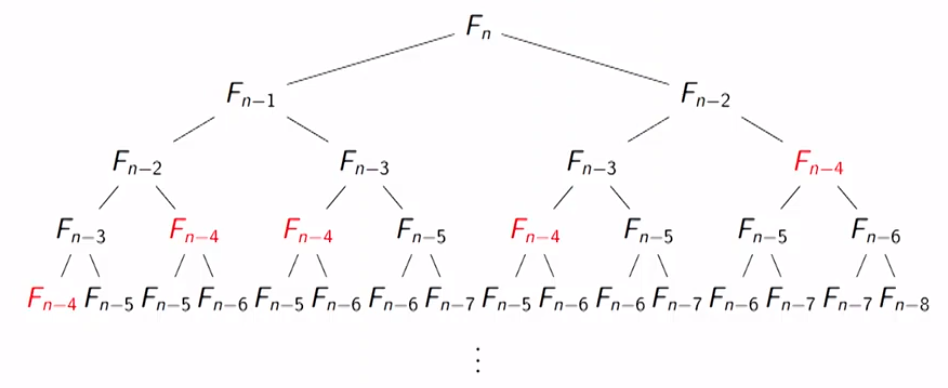

### Efficient Algorithm

Imitate hand computation:  
$0, \ 1, \ 1, \ 2, \ 3, \ 5, \ 8$

$0+1=1$  
$1+1=2$  
$1+2=3$  
$2+3=5$  
$3+5=8$  

In [178]:
@timed
def fib_list(n):
    F = [0 for _ in range(n + 1)]
    F[0:2] = [0, 1]
    for i in range(2, n + 1):
        F[i] = F[i - 1] + F[i - 2]
    return F[n]

In [179]:
n = 40
Fn = fib_list(40)
print(f"Fn({n}) = {Fn}")

func: fib_list, args: ((40,), {}), secs: 1.7e-05
Fn(40) = 102334155


## Greatest Common Divisors

**Definition**  
For integers, **a** an **b**, their *greatest common divisor* or  
gcd(a,b) is the largest integer **d** so that **d** divides both **a** 
and **b**.

### Naive Algorithm

In [124]:
@timed
def naive_gcd(a, b):
    best = 0
    for d in range(1, a + b + 1):
        if a%d + b%d == 0:
            best = d
    return best

In [135]:
a = 3_918_848
b = 1_653_264
Fn = naive_gcd(a, b)

print(f"Fn({n}) = {Fn}")

func: naive_gcd, args: ((3918848, 1653264), {}), secs: 0.48
Fn(40) = 61232


### Efficient Algorithm

**Lemma**  
Let $a'$ be the remainder when $a$ is divided by $b$, then  
$ gcd(a,b) = gcd(a',b) = gcd(b,'a)$

**Proof**
- $a=a' + bq$ for some $q$
- $d$ divides $a$ and $b$ *if and only if* it divides $a'$ and $b$

In [130]:
def euclid_gcd(a, b):
    if b == 0:
        return a
    a_prime = a % b
    return euclid_gcd(b, a_prime)

In [136]:
a = 3_918_848
b = 1_653_264

start = time.process_time()
Fn = euclid_gcd(a, b)
end = time.process_time()

print(f"{euclid_gcd.__name__}({a}, {b}) took: {end - start:.2} secs")
print(f"Fn({n}) = {Fn}")

euclid_gcd(3918848, 1653264) took: 9.8e-05 secs
Fn(40) = 61232


Finding the correct algorithm requires knowing something interesting
about the problem.

# Computing Runtime
To figure out how long a program would actually take to run on a real  
computer, we would also need to know things like:
- The seed of the computer the program is running on.
- The system architecture of the computer.
- The compiler being used.
- Details of the memory hierarchy.

**Problems**
- Figuring out accurate runtime is a huge mess.
- In practice, you might not even know some of these details.

## Asymptotic NOtation

How does runtime **scale** with input size.



### Approximate runtime
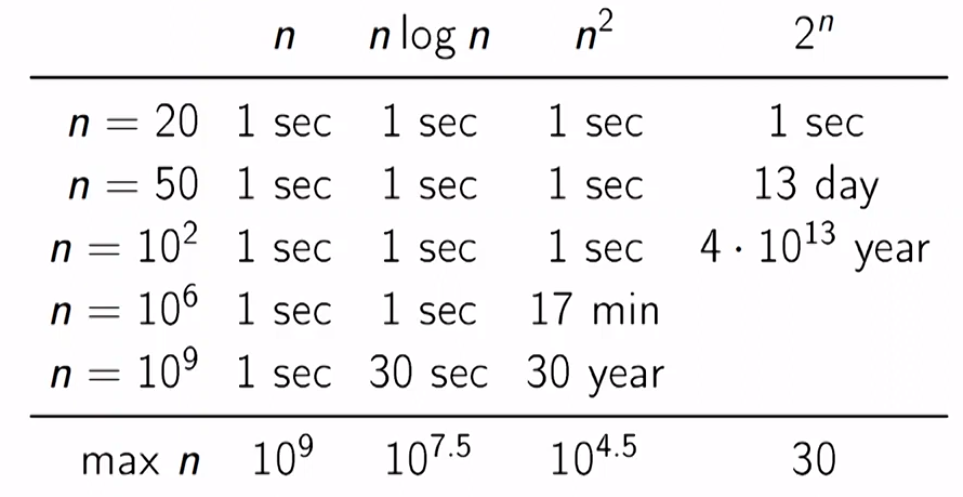

### Common times

 $\huge \log n < \sqrt{n} < n < n\log n < n² < 2^n$

The larger n is, the further these times become from each other.

## Big-O Notation

**Definition**

$f(n) = O(g(n))$  ($f$ if Big-O of $g$)  or $f \leq g$  
if there exist constants $N$ and $c$ so that for  
all $n \geq f(n) \leq c . g(n)$.

At least for sufficiently large inputs $f$ is bounded above by *some*  
constant multiple of $g$.

**Example**  
$3n² + 5n +2 = O(n²)$  since if  $n\geq 1,$  
$3n² + 5n +2 \geq 3n² + 5n² +2n² = 10n²$

### Advantages
- Clarifies growth rate.
- Cleans up notation: Makes easier to manipulate Big-O expressions.
- Allows to ignore complicated details.

### Warnings
- Using Big-O loses important information about constant multiples.
- Big-O is only asymptotic: It just give a notation for really big
inputs.

If you really want to make your program faster you need to look at    
more than just Big-O runtime.

## Using Big-O

### Common rules

#### Multiplicative constants can be omitted:
- $7n³ = O(n³),\, \frac{n²}{3} = O(n²)$
#### n with the larger exponent grows faster
$n^a < n^b \ $ for $\ 0 < a < b$  
- $n=O(n²),\, \sqrt{n}=O(n)$
#### In any polynomial the exponential always grows faster
$n^a < b^n \ (a < 0,\, b>1)$
- $n⁵ = O(\sqrt{2}²),\, n^{100} = O(1.1^n)$
#### Any power of $\log n$ grows slower than any power of n
$(log n)^a < n^b \, (a,b > 0)$
- $(log n)^3 =  O(\sqrt{2}),\, n(\log n) = O(n²)$
#### Smaller terms can be omitted
- $n² + n = O(n²),\, 2^n + n⁹ = O(2^n)$


### Big-O in Practice
Recall Algorithm:  
Compute this runtime in Big-O notation

**Function FibList(n)**
```
create an array F[0...n]
F[0] <- 0
F[1] <- 1
for i from 2 to n:
    F[i] <- F[i - 1] + F[i - 2]
return F[n]
```

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 20px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 20px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff00;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-zv4m"><span style="font-weight:bold"><b>Runtime</b></span></th>
    <th class="tg-zv4m"><span style="font-weight:bold"><b>Operation</b></span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-zv4m">create an array F [0...n]</td>
    <td class="tg-zv4m">O(n)</td>
  </tr>
  <tr>
    <td class="tg-zv4m">F[0] &lt;- 0</td>
    <td class="tg-zv4m">O(1)</td>
  </tr>
    <tr>
    <td class="tg-zv4m">F[1] &lt;- 1</td>
    <td class="tg-zv4m">O(1)</td>
  </tr>
  <tr>
    <td class="tg-zv4m">for i from 2 to n:</td>
    <td class="tg-zv4m">Loop O(n) times</td>
  </tr>
  <tr>
    <td class="tg-zv4m"><span style="padding:10px 20px;"/>F[i] &lt;- F[i - 1] + F[i - 2]</td>
    <td class="tg-zv4m">O(n)</td>
  </tr>
  <tr>
    <td class="tg-zv4m">return F[n]<br></td>
    <td class="tg-zv4m">O(1)</td>
  </tr>
</tbody>
</table>


**Total**  
$O(n)+O(1)+O(1)+O(n)*O(n)+O(1)=O(n²)$

Means if you want to finish this operation in a second,  
you can probably handle inputs of size maybe 30.000


## Other Notation (bounded below)

**Definition**  
For functions $f, g: \mathbb{N} \to \mathbb{R}^+$ we say that:  
-  $\small f(n)=\Omega(g(n)) \text{ or } f \geq g \text{ if for some }c$,  
$\small f(n)=c*g(n) \, (f\text{ grows no slower than }g).$

## Other Notation (same growth rate)

**Definition**  
For functions $f, g: \mathbb{N} \to \mathbb{R}^+$ we say that:  
-  $\small f(n)=\Theta(g(n)) \text{ or } f \asymp g \text{ if }f=O(g)$,  
$\small \text{ and } f(n)=\Omega(g(n)) (f\text{ grows at the same rate as }g).$

## Other Notation (strictly slower growth)

**Definition**  
For functions $f, g: \mathbb{N} \to \mathbb{R}^+$ we say that:  
-  $\small f(n)=o(g(n)) \text{ or } f \leq g \text{ if}$,  
$\small f(n)/g(n) \to 0\, \text{ as }n\to \infty \, (f\text{ grows slower than }g).$


# Algorithm design techniques

Three if the most common algorithmic design techniques:
- Greedy Algorithms.
- Divide and Conquer.
- Dynamic Programming.
